In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sugar-cane-production.csv')

In [10]:
df = df.rename(columns={"Entity" : "Country"})
df = df.rename(columns={"Sugar cane | 00000156 || Production | 005510 || tonnes":"Production(tonnes)"})

In [11]:
df.head()

,Country,Code,Year,Production(tonnes)
0,Afghanistan,AFG,1961,45000.0
1,Afghanistan,AFG,1962,45000.0
2,Afghanistan,AFG,1963,45000.0
3,Afghanistan,AFG,1964,45000.0
4,Afghanistan,AFG,1965,51000.0


In [12]:
df.columns

Index(['Country', 'Code', 'Year', 'Production(tonnes)'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8942 entries, 0 to 8941
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              8942 non-null   object 
 1   Code                6590 non-null   object 
 2   Year                8942 non-null   int64  
 3   Production(tonnes)  8942 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 279.6+ KB


In [13]:
df["Country"].nunique()

154

In [29]:
count = 0
for country in df["Country"].unique():
    count+=1
    print(country, end=", ")
    if count == 12:
        count = 0
        print()

Afghanistan, Africa, Africa (FAO), Americas (FAO), Angola, Antigua and Barbuda, Argentina, Asia, Asia (FAO), Australia, Bahamas, Bangladesh, 
Barbados, Belize, Benin, Bhutan, Bolivia, Brazil, Brunei, Burkina Faso, Burundi, Cambodia, Cameroon, Cape Verde, 
Caribbean (FAO), Central African Republic, Central America (FAO), Chad, China, China (FAO), Colombia, Congo, Costa Rica, Cote d'Ivoire, Cuba, Democratic Republic of Congo, 
Djibouti, Dominica, Dominican Republic, Eastern Africa (FAO), Eastern Asia (FAO), Ecuador, Egypt, El Salvador, Eswatini, Ethiopia, Ethiopia (former), Europe, 
Europe (FAO), European Union (27), European Union (27) (FAO), Fiji, French Guiana, French Polynesia, Gabon, Ghana, Grenada, Guadeloupe, Guatemala, Guinea, 
Guinea-Bissau, Guyana, Haiti, High-income countries, Honduras, India, Indonesia, Iran, Iraq, Jamaica, Japan, Kenya, 
Kuwait, Land Locked Developing Countries (FAO), Laos, Least Developed Countries (FAO), Lebanon, Liberia, Low Income Food Deficit Countries 

In [19]:
df['Country'].describe()

count            8942
unique            154
top       Afghanistan
freq               63
Name: Country, dtype: object

<Axes: title={'center': 'World Sugarcane Production'}, xlabel='YEAR', ylabel='Production (tonnes)'>

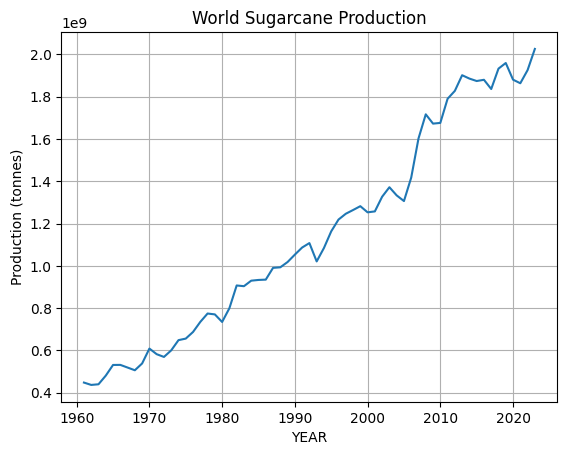

In [27]:
temp_df = df[df['Country']=="World"]
temp_df.plot(kind="line", 
             grid=True, 
             x="Year", 
             y="Production(tonnes)", 
             legend=False, 
             xlabel="YEAR", 
             ylabel="Production (tonnes)", 
             title="World Sugarcane Production")

<Axes: title={'center': "India's Sugarcane Production"}, xlabel='YEAR', ylabel='Production (tonnes)'>

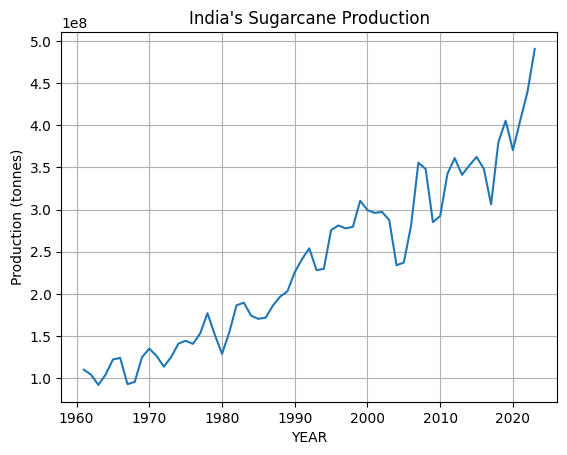

In [28]:
temp_df = df[df['Country']=="India"]
temp_df.plot(kind="line", 
             grid=True, 
             x="Year", 
             y="Production(tonnes)", 
             legend=False, 
             xlabel="YEAR", 
             ylabel="Production (tonnes)", 
             title="India's Sugarcane Production")

## Which year a country produce more sugarcane than previous year?

In [59]:
data = df[df["Country"]=="Africa"].values
result = {}

for i in range(1, len(data)):
    previous = data[i-1][3]
    current = data[i][3]

    if current - previous > 0:
        year_range = str(data[i][2]) + ' more than ' + str(data[i-1][2])

        country = data[i][0]
        if country not in result:
            result[country] = []
        result[country].append(year_range)


for country, years in result.items():
    print(country, ":", years)


Africa : ['1962 more than 1961', '1963 more than 1962', '1965 more than 1964', '1966 more than 1965', '1967 more than 1966', '1969 more than 1968', '1971 more than 1970', '1972 more than 1971', '1974 more than 1973', '1976 more than 1975', '1977 more than 1976', '1978 more than 1977', '1979 more than 1978', '1981 more than 1980', '1982 more than 1981', '1984 more than 1983', '1986 more than 1985', '1987 more than 1986', '1991 more than 1990', '1994 more than 1993', '1995 more than 1994', '1996 more than 1995', '1997 more than 1996', '1998 more than 1997', '2000 more than 1999', '2002 more than 2001', '2005 more than 2004', '2009 more than 2008', '2011 more than 2010', '2012 more than 2011', '2013 more than 2012', '2017 more than 2016', '2018 more than 2017', '2019 more than 2018', '2020 more than 2019', '2022 more than 2021']
